# Final Tutorial - Crimes in Boston
Natalie Anderson and Erin Schick

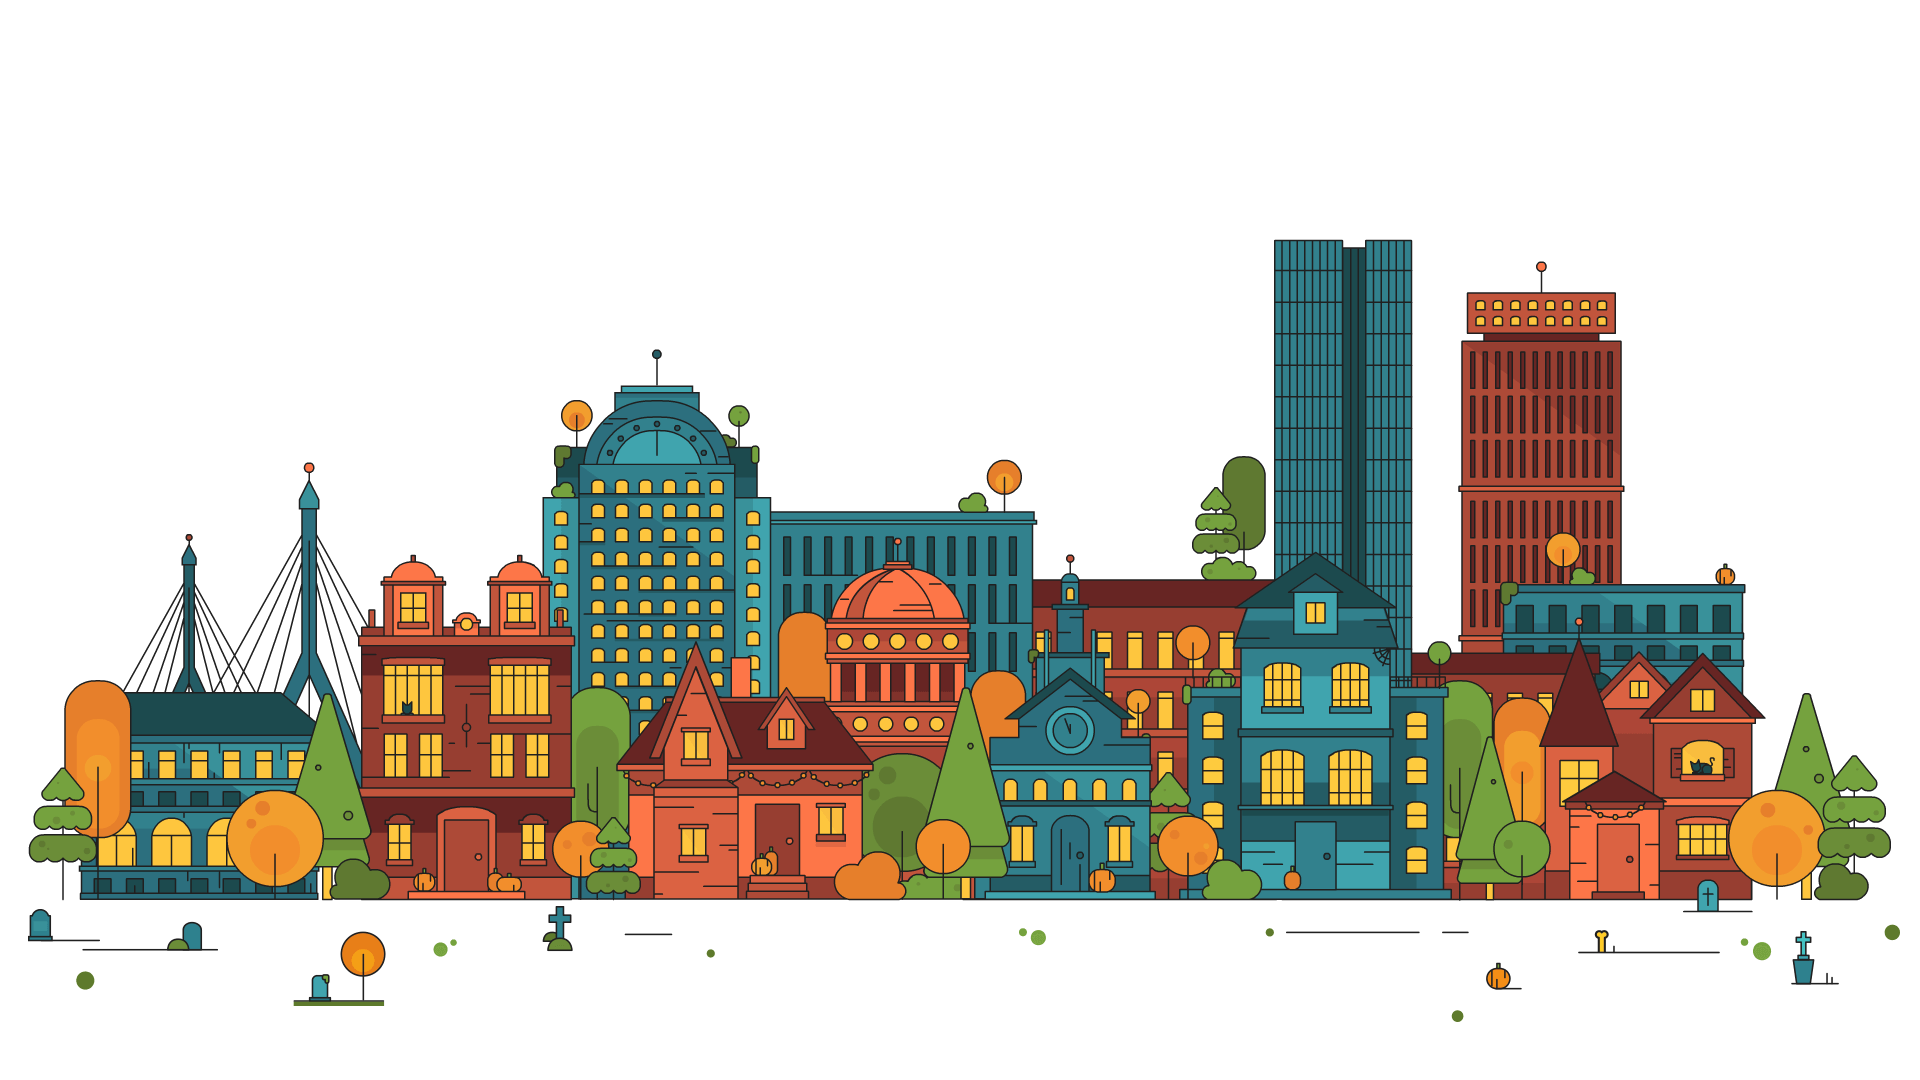

# Purpose
The purpose of this tutorial is to walk you through a specific data science pipeline based off of a dataset found on Kaggle.com that provides data on various crimes that occured in Boston between 2015 and 2018.

# Contents of Tutorial

- Libraries You Need
- Data Curation 
- Parsing/Data Management 
- Data Analysis 
- Hypothesis Testing 
- Machine Learning 


# Libraries You Need
The python libraries that will be used are all imported below

In [15]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from statsmodels import api as sm

# Data Curration
The data that we will be working with is from https://www.kaggle.com/AnalyzeBoston/crimes-in-boston#. To follow along with this tutorial, you should download the crime.csv file and save it in the same folder as your currect python 3 file. In this example, I renamed the crime.csv to boston_crime.csv for better identification on my local computer.

In this section, we will be importing this csv file and saving it into a dataframe called df. You can think of a python dataframe as an excel sheet or a table of information. We will then "clean up" the dataset to make further analysis of the data easier to complete. 

By cleaning the data, we will make sure that the...
- Dataframe only contains columns that we will need for further analysis 
- The titles are accurate and understandable
- The data types are correct (numbers are ints, dates are date-time objects, strings are objects, etc)
- We replace as many NaN (null/blank) values as we can with something meaningful

In [2]:
# Importing the csv file into a dataframe called df
df = pd.read_csv('boston_crime.csv', encoding = "ISO-8859-1")

# Use this function to show the first couple of rows of the data set to ensure it was imported correctly
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182066132,2629,Harassment,HARASSMENT,B3,455,NaN,7/31/15 23:27,2015,7,Friday,23,Part Two,RADCLIFFE ST,42.300202,-71.078354,"(42.30020194, -71.07835353)"
1,I182061268,3201,Property Lost,PROPERTY - LOST,NaN,,NaN,6/15/15 0:00,2015,6,Monday,0,Part Three,BERNARD,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"
2,I182054888,2647,Other,THREATS TO DO BODILY HARM,B2,326,NaN,7/12/15 15:37,2015,7,Sunday,15,Part Two,FAYSTON ST,42.312243,-71.075499,"(42.31224327, -71.07549901)"
3,I182052842,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,619,NaN,12/20/15 14:00,2015,12,Sunday,14,Part Two,WESTLAND AVE,42.343917,-71.089675,"(42.34391716, -71.08967541)"
4,I182052842,619,Larceny,LARCENY ALL OTHERS,D4,619,NaN,12/20/15 14:00,2015,12,Sunday,14,Part One,WESTLAND AVE,42.343917,-71.089675,"(42.34391716, -71.08967541)"


In [3]:
# Removing certain columns that will not be needed for further analysis
del df['Lat']
del df['Long']
del df['UCR_PART']

In [4]:
# Rename "Location" Column to keep the the all-caps trend in column titles
df.rename(columns={"Location": "LOCATION"}, inplace = True)

# Check that this worked
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,LOCATION
0,I182066132,2629,Harassment,HARASSMENT,B3,455,NaN,7/31/15 23:27,2015,7,Friday,23,RADCLIFFE ST,"(42.30020194, -71.07835353)"
1,I182061268,3201,Property Lost,PROPERTY - LOST,NaN,,NaN,6/15/15 0:00,2015,6,Monday,0,BERNARD,"(-1.00000000, -1.00000000)"
2,I182054888,2647,Other,THREATS TO DO BODILY HARM,B2,326,NaN,7/12/15 15:37,2015,7,Sunday,15,FAYSTON ST,"(42.31224327, -71.07549901)"
3,I182052842,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,619,NaN,12/20/15 14:00,2015,12,Sunday,14,WESTLAND AVE,"(42.34391716, -71.08967541)"
4,I182052842,619,Larceny,LARCENY ALL OTHERS,D4,619,NaN,12/20/15 14:00,2015,12,Sunday,14,WESTLAND AVE,"(42.34391716, -71.08967541)"


In [5]:
# Check to see what types each column is
df.dtypes

INCIDENT_NUMBER        object
OFFENSE_CODE            int64
OFFENSE_CODE_GROUP     object
OFFENSE_DESCRIPTION    object
DISTRICT               object
REPORTING_AREA         object
SHOOTING               object
OCCURRED_ON_DATE       object
YEAR                    int64
MONTH                   int64
DAY_OF_WEEK            object
HOUR                    int64
STREET                 object
LOCATION               object
dtype: object

You want to make sure all columns are the correct type to avoid errors down the line with your data analysis. In python you want strings to be objects, whole numbers to be integers, numbers with decimals to be floats, and dates with times to be DateTime objects. You can learn more about the different python datatypes there are here: https://www.w3schools.com/python/python_datatypes.asp

From the dataframe df and the result above you realize that you want to change "OCCURRED_ON_DATE" to a DateTime object.

In [6]:
# Convert column to DateTime object
df['OCCURRED_ON_DATE'] =  pd.to_datetime(df['OCCURRED_ON_DATE'], format='%m/%d/%y %H:%M')

# Confirm that the data type of "OCCURRED_ON_DATE" is now correct
df.dtypes

INCIDENT_NUMBER                object
OFFENSE_CODE                    int64
OFFENSE_CODE_GROUP             object
OFFENSE_DESCRIPTION            object
DISTRICT                       object
REPORTING_AREA                 object
SHOOTING                       object
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                    object
HOUR                            int64
STREET                         object
LOCATION                       object
dtype: object

In [7]:
# Make sure all blank/empty elements in the dataframe are null
df['REPORTING_AREA'] = df['REPORTING_AREA'].str.strip()
df['REPORTING_AREA'] = df['REPORTING_AREA'].replace('', np.nan)

df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,LOCATION
0,I182066132,2629,Harassment,HARASSMENT,B3,455,NaN,2015-07-31 23:27:00,2015,7,Friday,23,RADCLIFFE ST,"(42.30020194, -71.07835353)"
1,I182061268,3201,Property Lost,PROPERTY - LOST,NaN,NaN,NaN,2015-06-15 00:00:00,2015,6,Monday,0,BERNARD,"(-1.00000000, -1.00000000)"
2,I182054888,2647,Other,THREATS TO DO BODILY HARM,B2,326,NaN,2015-07-12 15:37:00,2015,7,Sunday,15,FAYSTON ST,"(42.31224327, -71.07549901)"
3,I182052842,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,619,NaN,2015-12-20 14:00:00,2015,12,Sunday,14,WESTLAND AVE,"(42.34391716, -71.08967541)"
4,I182052842,619,Larceny,LARCENY ALL OTHERS,D4,619,NaN,2015-12-20 14:00:00,2015,12,Sunday,14,WESTLAND AVE,"(42.34391716, -71.08967541)"


Now we realize that in the SHOOTING column of the datafram there are a lot of np.nan values. Through further exploration of the column you can realize that this is because a "Y" is only marked if there was a shooting but otherwise the value is null. To represent a shooting or no shooting we will be replacing the null values with 0 to represent that no shooting took place and all "Y" values with 1 to represent that a shooting did take place.

In [8]:
# Make the np.nan values in SHOOTING (which )
df['SHOOTING'] = df['SHOOTING'].replace(np.nan, '0')
df['SHOOTING'] = df['SHOOTING'].replace('Y', '1')

df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,LOCATION
0,I182066132,2629,Harassment,HARASSMENT,B3,455,0,2015-07-31 23:27:00,2015,7,Friday,23,RADCLIFFE ST,"(42.30020194, -71.07835353)"
1,I182061268,3201,Property Lost,PROPERTY - LOST,NaN,NaN,0,2015-06-15 00:00:00,2015,6,Monday,0,BERNARD,"(-1.00000000, -1.00000000)"
2,I182054888,2647,Other,THREATS TO DO BODILY HARM,B2,326,0,2015-07-12 15:37:00,2015,7,Sunday,15,FAYSTON ST,"(42.31224327, -71.07549901)"
3,I182052842,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,619,0,2015-12-20 14:00:00,2015,12,Sunday,14,WESTLAND AVE,"(42.34391716, -71.08967541)"
4,I182052842,619,Larceny,LARCENY ALL OTHERS,D4,619,0,2015-12-20 14:00:00,2015,12,Sunday,14,WESTLAND AVE,"(42.34391716, -71.08967541)"


### Insights
Now that we have a clean and organized data set that will help our further analysis to have less errors. Keep in mind that this is an incredibly important area to focus the beginning of your data analysis project time on so that you help yourself further down the line!

# Parsing/Data Management
What's gonna happen....

- top ten of something

In [9]:
# code

### Insights
here

# Data Analysis
What's gonna happen....

- graphing, mean, spread, skew for date, location, time, etc

In [10]:
# code

### Insights
here

# Hypothesis Testing
In this section we are going to test the null hypothesis: "The month a crime occurs impacts/has a correlation to whether or not there was a shooting."

The testing of this hypothesis will be done with a multiple regression model as seen below. You can learn more about multiple regression models here: https://towardsdatascience.com/understanding-multiple-regression-249b16bde83e

In [11]:
# Independent variable
cols = ["MONTH", "HOUR", "YEAR"]
feats = df[cols]

# Dependent variable
target = df[["SHOOTING"]]

In [12]:
X = feats 
y = target["SHOOTING"]

# Making and fitting the linear regression model
lin_model = linear_model.LinearRegression()
model = lin_model.fit(X, y)

# Printing the R-squared score of the model
lin_model.score(X, y)

8.70382625146604e-05

The r-squared value above tells you how well the data (including variance) is fitted by the model. Having such a small value that is close to 0 above tells us that none of the data is well fitted by the model.

Now we will continue on to see the coefficients for each attribute we are analyzing. The larger the coefficent (in a positive or negative direction), the larger the impact to the data as a whole and vice versa.

In [13]:
sklearn_coefficients = lin_model.coef_.tolist()

# Printing these coefficients so that it is easier to read/understand
for i in range(len(cols)):
    print("{0}'s Coefficient: {1}".format(cols[i], sklearn_coefficients[i]))
    print()

MONTH's Coefficient: 0.0001523898129633616

HOUR's Coefficient: 3.93925542486709e-05

YEAR's Coefficient: 0.00014019846215640862



Now having seen these coefficients, you realize that they are really close to zero and therefore not implying a large impact on the data. However, we cannot stop here because you cannot assume correlation or non-correlation with just these coefficents. We have to calculate the attribute's p-values to know for sure which is done below using the method of Ordinary Least Squares. 

The goal of Ordinary Least Squares is to "estimates the parameters in a regression model by minimizing the sum of the squared residuals." You can read more about this here: https://statisticsbyjim.com/glossary/ordinary-least-squares/

In [14]:
sm_X = X
sm_y = y

sm_X = sm.add_constant(X)

ols_model = sm.OLS(y.astype(float), X.astype(float)).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               SHOOTING   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              349.5
Date:                Wed, 13 May 2020   Prob (F-statistic):                   1.30e-226
Time:                        22:58:11   Log-Likelihood:                      4.6457e+05
No. Observations:              319073   AIC:                                 -9.291e+05
Df Residuals:                  319070   BIC:                                 -9.291e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MONTH          0.0001   3.05e-05      4.462      0.000    7.63e-05       0.000
HOUR        3.943e-05   1.59e-05      2.485      0.013    8.33e-06    7.05e-05
YEAR        8.811e-07   1.52e-07      5.803      0.000    5.84e-07    1.18e-06
==============================================================================
Omnibus:                   651694.753   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1278303971.507
Skew:                          17.608   Prob(JB):                         0.00
Kurtosis:                     311.077   Cond. No.                         616.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Insights

There is not a great impact of any of the three attributes on the data, the hour of the day the crime occurred is slightly higher but not enough for it to be statistically significant because the p-value is still less than 0.05. Esstentially, the p-values ("P>|t|" in the second table) tell us if each coefficient is significant or not. The further the way it is from 0 the more statically significant it is with 0.05 normally being the bottom threshold for data analysists to be comfortable considering the attribute to be significant. As we can see above, all three attributes (hour, month, and year) are all under that 0.05 threshold.

Additionally, the coefficients for each attribute are close to zero which, as discussed above, indicated that this attribute has a small impact on the data as a whole.

Lastly, the first table of the data shows a very small (close to zero) r-squared value. As discussed above, the r-squared value above tells you how well the data is fitted by the model. Therefore we can tell that this data is not well fitted to the model. 

In conclusion, going back to our original goal of testing our null hypothesis, we find that we have to reject the null hypothesis because the p-values are below the 0.05 threshold. 

For more information about this topic, you can read more about hypothesis testing here: https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/hypothesis-testing


## References

- Data URL: https://www.kaggle.com/AnalyzeBoston/crimes-in-boston
- Python Data Types: https://www.w3schools.com/python/python_datatypes.asp
- Multiple Regression Models: https://towardsdatascience.com/understanding-multiple-regression-249b16bde83e
- Ordinary Least Squares: https://statisticsbyjim.com/glossary/ordinary-least-squares/
- Hypothesis Testing: https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/hypothesis-testing
